In [118]:
# import stuff
import os
cwd = os.getcwd()
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import json
import re
# import json
#from textwrap import wrap 
#from collections import Counter
#from nltk.corpus import stopwords
#stopw=set(stopwords.words('english'))
%matplotlib inline 
# display matplotlib plots in jupyter
# plt.ioff() 
# stops graphs from over writing eachother
import glob

# New York Census, race data

In [12]:
files = sorted(glob.glob('Data/*Race*geojson'))
files

['Data/NY_Census_Race_Data__R_Manipulated-Percent_Columns.geojson',
 'Data/NY_Census_Race_Data__R_Manipulated-Total_Columns.geojson']

In [148]:
tmp = pd.read_csv('/home/billbrod/Downloads/all_140_in_36.P3.csv')

In [150]:
tmp.iloc[332]

GEOID                   36005046201
SUMLEV                          140
STATE                            36
COUNTY                            5
CBSA                          35620
CSA                             408
NECTA                           NaN
CNECTA                          NaN
NAME            Census Tract 462.01
POP100                        26588
HU100                         12651
POP100.2000                   24523
HU100.2000                    11522
P003001                       26588
P003001.2000                  24523
P003002                        6008
P003002.2000                   6856
P003003                       16804
P003003.2000                  14476
P003004                         115
P003004.2000                     71
P003005                         348
P003005.2000                    245
P003006                          15
P003006.2000                     15
P003007                        2349
P003007.2000                   1955
P003008                     

In [116]:
data['features'][0]['properties']

{'ALAND10': '81287303',
 'AWATER10': '16045715',
 'American_Indian_and_Alaska_Natives_Perc_P003004': '0.4',
 'Asian_Alone_Perc_P003005': '2.6',
 'Black_African_Americans_Alone_Perc_P003003': '65.3',
 'CBSA': 10580,
 'COUNTY': 1,
 'COUNTYFP10': '099',
 'CSA': 104,
 'FUNCSTAT10': 'S',
 'GEOID': 36001000100,
 'GEOID10': '36099951000',
 'HU100': 910,
 'HU100.2000': 824,
 'INTPTLAT10': '+42.5844045',
 'INTPTLON10': '-076.6966089',
 'MTFCC10': 'G5020',
 'NAME': 'Census Tract 1',
 'NAME10': '9510',
 'NAMELSAD10': 'Census Tract 9510',
 'Native_Hawaiian_and_Other_Pacific_Islanders_Perc_P003006': '0.0',
 'Other_Race_Perc_P003007': '3.9',
 'POP100': 2139,
 'POP100.2000': 1728,
 'Race_Total_P003001': 2139,
 'STATE': 36,
 'STATEFP10': '36',
 'SUMLEV': 140,
 'TRACTCE10': '951000',
 'Two_Or_More_Perc_P003008': '4.2',
 'White_Alone_Perc_P003002': '23.7'}

In [151]:
NYC_COUNTIES = {'005': 'Bronx','047': 'Brooklyn','061': 'Manhattan','081': 'Queens', '085': 'Staten Island'}
def try_to_cast(x):
    try:
        x = float(x)
    except ValueError:
        if x == '#DIV/0!':
            x = 0
    return x

def load_json_to_df(filename, identifying_func):
    with open(filename) as f:
        data = json.load(f)['features']
    df = []
    for d in data:
        row = d['properties']
        if row['COUNTYFP10'] not in NYC_COUNTIES.keys():
            continue
        row_data = dict((k, try_to_cast(v)) for (k, v) in row.items() if identifying_func(k))
        row_data['County'] = NYC_COUNTIES[row['COUNTYFP10']]
        census_tract = re.search('Census Tract ([0-9.]+)', row['NAME']).groups()[0]
        df.append(pd.DataFrame(row_data, index=[census_tract]))
    df = pd.concat(df).reset_index()
    df = df.rename(columns={'index': 'Census_tract'})
    return df

In [152]:
identifying_func = lambda x: 'P003' in x
df = load_json_to_df(files[1], identifying_func)

In [147]:
df[(df.Census_tract=='198')&(df.County=='Staten Island')]

,Census_tract,American_Indian_and_Alaska_Natives_P003004,American_Indian_and_Alaska_Natives_Perc_P003004,American_Indian_and_Alaska_Natives_V2_P003004.2000,Asian_Alone_P003005,Asian_Alone_Perc_P003005,Asian_Alone_V2P003005.2000,Black_African_Americans_Alone_P003003,Black_African_Americans_Alone_Perc_P003003,Black_African_Americans_V2_P003003.2000,...,Other_Race_Perc_P003007,Other_Race_V2_P003007.2000,Race_Total_P003001,Race_Total_V2_P003001.2000,Two_Or_More_P003008,Two_Or_More_Perc_P003008,Two_Or_More_V2_P003008.2000,White_Alone_P003002,White_Alone_Perc_P003002,White_Alone_V2_P003002.2000
103,198,30.0,0.8,5.0,44.0,1.1,19.0,115.0,2.9,113.0,...,0.4,15.0,3955.0,4106.0,132.0,3.3,56.0,3618.0,91.5,3898.0


In [131]:
plot_df = pd.melt(df, id_vars=['County', 'Census_tract'])

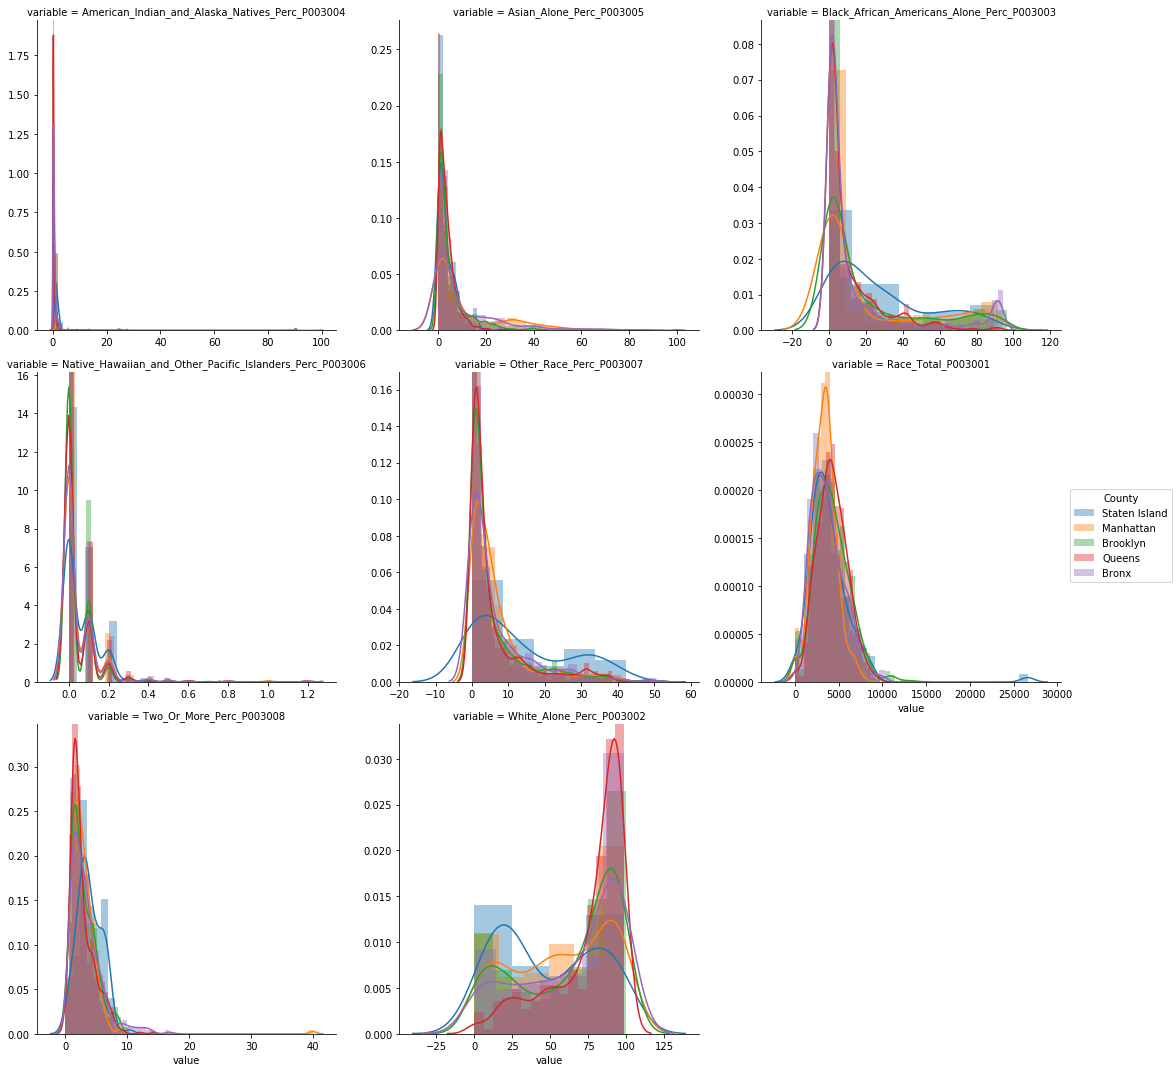

In [134]:
g = sns.FacetGrid(plot_df, col='variable', hue='County', col_wrap=3, size=5, sharex=False, sharey=False)
g.map(sns.distplot, 'value')
g.add_legend()